In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,auc

In [0]:
#reading data 
# data link https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

In [0]:
prd_df=pd.read_csv('/content/drive/My Drive/AI_ML_CLass/Assignments/external/Ensemble/Project1/parkinsons.data')

In [73]:
prd_df.shape

(195, 24)

In [5]:
#printing random 5 element 
rand = np.random.randint(0,195,5);
prd_df.iloc[rand]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
56,phon_R01_S16_3,110.417,131.067,103.370,0.00784,0.00007,0.00352,0.00514,0.01056,0.03715,0.334,0.02032,0.02302,0.02802,0.06097,0.00969,21.422,1,0.541781,0.821364,-4.438453,0.238298,1.922940,0.335041
61,phon_R01_S17_2,223.365,238.987,98.664,0.00264,0.00001,0.00154,0.00151,0.00461,0.01906,0.165,0.01013,0.01296,0.01340,0.03039,0.00301,26.138,0,0.447979,0.686264,-7.293801,0.086372,2.321560,0.098555
11,phon_R01_S02_6,91.904,115.871,86.292,0.00540,0.00006,0.00281,0.00336,0.00844,0.02752,0.249,0.01424,0.01641,0.02214,0.04272,0.01141,21.414,1,0.583390,0.792520,-4.960234,0.363566,2.642476,0.275931
134,phon_R01_S33_1,106.516,112.777,93.105,0.00589,0.00006,0.00291,0.00319,0.00873,0.04932,0.441,0.02683,0.03112,0.03651,0.08050,0.03031,17.060,1,0.637814,0.744064,-5.301321,0.320385,2.375138,0.243080
67,phon_R01_S18_2,136.969,166.607,66.004,0.00923,0.00007,0.00507,0.00463,0.01520,0.03111,0.308,0.01638,0.01759,0.02603,0.04914,0.02659,19.979,1,0.498133,0.729067,-5.324574,0.205660,2.291558,0.226247


In [5]:
prd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

* all column count are same and datatype belogs to float or Object.So there are no missing value.

In [13]:
# checking any data point having zero value # since zero value should not present
prd_df[prd_df==0].count()
#below result showing none of column element except status is zero.  

name                 0
MDVP:Fo(Hz)          0
MDVP:Fhi(Hz)         0
MDVP:Flo(Hz)         0
MDVP:Jitter(%)       0
MDVP:Jitter(Abs)     0
MDVP:RAP             0
MDVP:PPQ             0
Jitter:DDP           0
MDVP:Shimmer         0
MDVP:Shimmer(dB)     0
Shimmer:APQ3         0
Shimmer:APQ5         0
MDVP:APQ             0
Shimmer:DDA          0
NHR                  0
HNR                  0
status              48
RPDE                 0
DFA                  0
spread1              0
spread2              0
D2                   0
PPE                  0
dtype: int64

In [0]:
# remove name column 
prd_df=prd_df.drop(columns=['name'],axis=1);

============================Question : 3 ================================

In [10]:
prd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


# Univariate EDA

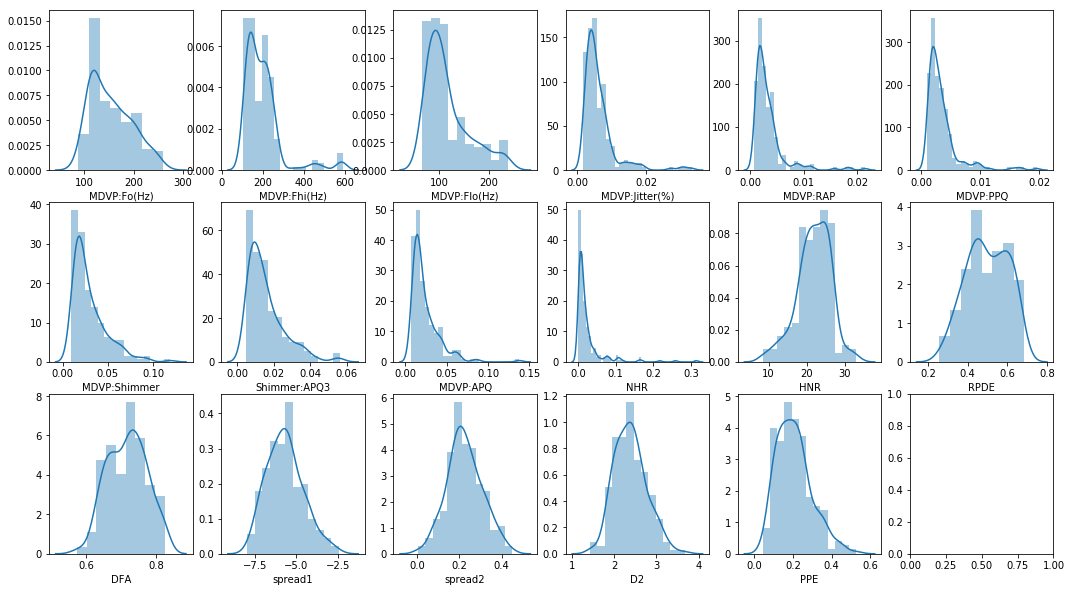

In [40]:
# first see distribution
plotCofig, axes = plt.subplots(nrows=3,ncols = 6, figsize=(18, 10))

#plt.title('Histogram of MDVP:Fo(Hz)')
#plt.xlabel('MDVP:Fo(Hz)')
sns.distplot(prd_df['MDVP:Fo(Hz)'],ax=axes[0,0])
sns.distplot(prd_df['MDVP:Fhi(Hz)'],ax=axes[0,1])
sns.distplot(prd_df['MDVP:Flo(Hz)'],ax=axes[0,2])
sns.distplot(prd_df['MDVP:Jitter(%)'],ax=axes[0,3])
sns.distplot(prd_df['MDVP:RAP'],ax=axes[0,4])
sns.distplot(prd_df['MDVP:PPQ'],ax=axes[0,5])
#####2nd row
sns.distplot(prd_df['MDVP:Shimmer'],ax=axes[1,0])
sns.distplot(prd_df['Shimmer:APQ3'],ax=axes[1,1])
sns.distplot(prd_df['MDVP:APQ'],ax=axes[1,2])
sns.distplot(prd_df['NHR'],ax=axes[1,3])
sns.distplot(prd_df['HNR'],ax=axes[1,4])
sns.distplot(prd_df['RPDE'],ax=axes[1,5])
###3rd row
sns.distplot(prd_df['DFA'],ax=axes[2,0])
sns.distplot(prd_df['spread1'],ax=axes[2,1])
sns.distplot(prd_df['spread2'],ax=axes[2,2])
sns.distplot(prd_df['D2'],ax=axes[2,3])
sns.distplot(prd_df['PPE'],ax=axes[2,4])
#plt.hist()

In [0]:
# now we draw individual box-plot 
# col = list[MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,MDVP:Shimmer,Shimmer:APQ3,NHR]

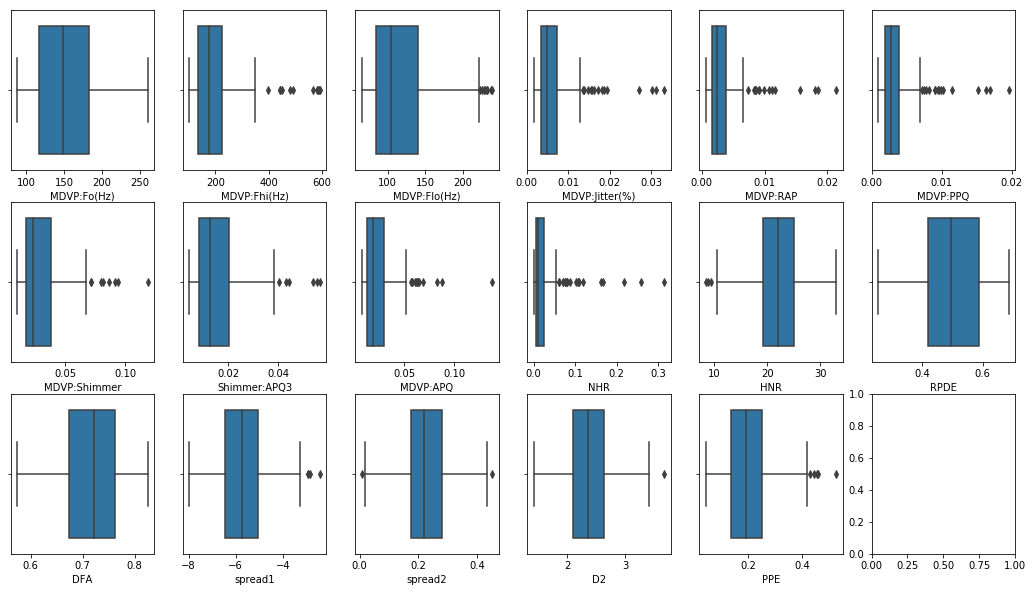

In [21]:
plotCofig, axes = plt.subplots(nrows=3,ncols = 6, figsize=(18, 10))
sns.boxplot(prd_df['MDVP:Fo(Hz)'],ax=axes[0,0])
sns.boxplot(prd_df['MDVP:Fhi(Hz)'],ax=axes[0,1])
sns.boxplot(prd_df['MDVP:Flo(Hz)'],ax=axes[0,2])
sns.boxplot(prd_df['MDVP:Jitter(%)'],ax=axes[0,3])
sns.boxplot(prd_df['MDVP:RAP'],ax=axes[0,4])
sns.boxplot(prd_df['MDVP:PPQ'],ax=axes[0,5])
#####2nd row
sns.boxplot(prd_df['MDVP:Shimmer'],ax=axes[1,0])
sns.boxplot(prd_df['Shimmer:APQ3'],ax=axes[1,1])
sns.boxplot(prd_df['MDVP:APQ'],ax=axes[1,2])
sns.boxplot(prd_df['NHR'],ax=axes[1,3])
sns.boxplot(prd_df['HNR'],ax=axes[1,4])
sns.boxplot(prd_df['RPDE'],ax=axes[1,5])
###3rd row
sns.boxplot(prd_df['DFA'],ax=axes[2,0])
sns.boxplot(prd_df['spread1'],ax=axes[2,1])
sns.boxplot(prd_df['spread2'],ax=axes[2,2])
sns.boxplot(prd_df['D2'],ax=axes[2,3])
sns.boxplot(prd_df['PPE'],ax=axes[2,4])

### Univariate Observation : 

1.   Distribution of most of features/columns data point are right skewed.That means very long at right side and very short tail at left side.
2. Data points of Feature columns MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,MDVP:Shimmer,Shimmer:APQ3,NHR are in right skewed.
3.  Data Points of Feature columns HNR, RPDE,DFA,spread1,spread2,D2,PPE are nealy normaly distributed.
4.  Since distribution is right skewed, So We can see that there are many outlier at data points.(As above box plot we can see.)
5. Spread is narrow for such features like MDVP Jitter(%),NHR,RA{,PPQ,RPQ etc.


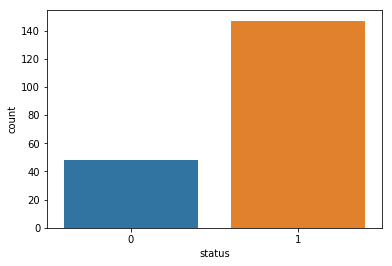

In [8]:
## check class balance
sns.countplot(x='status', data = prd_df)
# as we can see, datas are not balanced with status class which means there 147 records who having pankison. 

In [9]:
prd_df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

# Bivariate EDA :

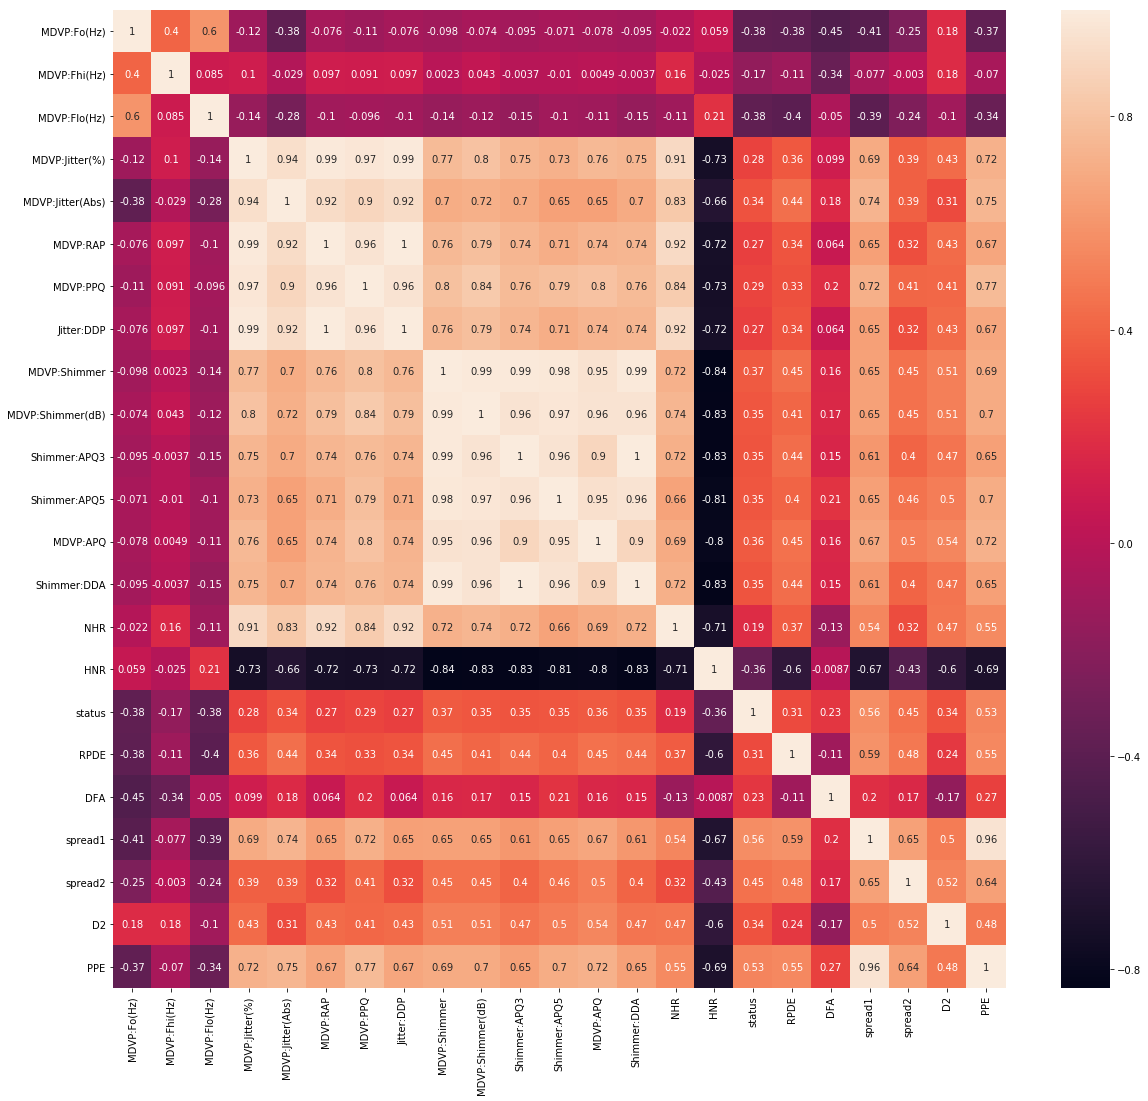

In [21]:
# First, looking correlation between features:
plt.figure(figsize=(20, 18))
sns.heatmap(prd_df_corr,annot=True)

### Heat-Map Observation : 
1.   Some of fetures/columns seem like similar or their correlation are very high near to 0.99.
2.   MDVPSIMMER,MDVBSIMMER(DB),SIMMER(DDA),MDVBSIMMER(AQ5),AQ7 feature look like similar to each other.
3.  Samething with Jitter related columns, these looks similar due to high correaltion.
4.  As we can say most of feture are not independent.They are co-related to each other.


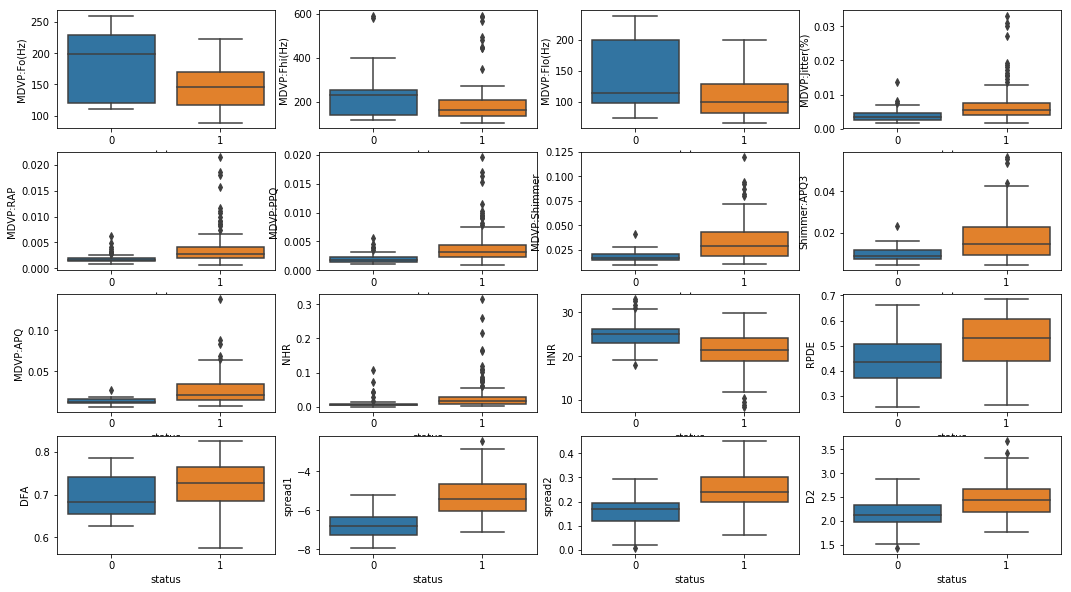

In [12]:
plotCofig, axes = plt.subplots(nrows=4,ncols = 4, figsize=(18, 10))
sns.boxplot(y=prd_df['MDVP:Fo(Hz)'],x=prd_df['status'],ax=axes[0,0])
sns.boxplot(y=prd_df['MDVP:Fhi(Hz)'],x=prd_df['status'],ax=axes[0,1])
sns.boxplot(y=prd_df['MDVP:Flo(Hz)'],x=prd_df['status'],ax=axes[0,2])
sns.boxplot(y=prd_df['MDVP:Jitter(%)'],x=prd_df['status'],ax=axes[0,3])
sns.boxplot(y=prd_df['MDVP:RAP'],x=prd_df['status'],ax=axes[1,0])
sns.boxplot(y=prd_df['MDVP:PPQ'],x=prd_df['status'],ax=axes[1,1])
#####2nd row
sns.boxplot(y=prd_df['MDVP:Shimmer'],x=prd_df['status'],ax=axes[1,2])
sns.boxplot(y=prd_df['Shimmer:APQ3'],x=prd_df['status'],ax=axes[1,3])
sns.boxplot(y=prd_df['MDVP:APQ'],x=prd_df['status'],ax=axes[2,0])
sns.boxplot(y=prd_df['NHR'],x=prd_df['status'],ax=axes[2,1])
sns.boxplot(y=prd_df['HNR'],x=prd_df['status'],ax=axes[2,2])
sns.boxplot(y=prd_df['RPDE'],x=prd_df['status'],ax=axes[2,3])
###3rd row
sns.boxplot(y=prd_df['DFA'],x=prd_df['status'],ax=axes[3,0])
sns.boxplot(y=prd_df['spread1'],x=prd_df['status'],ax=axes[3,1])
sns.boxplot(y=prd_df['spread2'],x=prd_df['status'],ax=axes[3,2])
sns.boxplot(y=prd_df['D2'],x=prd_df['status'],ax=axes[3,3])
#sns.boxplot(y=prd_df['PPE'],x=prd_df['status'],ax=axes[2,4])

##boxplot observation :
1. Most datapoints of feature are overlapping each other with person having Parkinson or not.
2. But Spread1 and Spread2, as we can see, are clearly seperated from each other.There is higher chance the one having higher value of spred 1 and spread 2,will be affected by perkinson.
3. The one having lowere value of MDVP Fo,MDVP Flo,NHR might be affected perkinson in other word we can say higher value of these parameter not overlapping each other which mean higher value of these parameter indicate the one is not affected by perkinson.
4. feature RPDE,DFA overlapping with status at higher value.

In [0]:
# split data into train and test set into 70 : 30
X=prd_df.loc[:,['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)',
                'MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3',
                'Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']]
y=prd_df['status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [76]:
# taking simple decision tree without using regularization parameter
prdtree=DecisionTreeClassifier(criterion='entropy')
prdtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
# test with test-data set
y_pred=prdtree.predict(X_test)
# accuracy score
print('accuracy : ',accuracy_score(y_test,y_pred))
print(pd.crosstab(y_test,y_pred, margins=True, margins_name="Total"))

accuracy :  0.8305084745762712
col_0    0   1  Total
status               
0       11   6     17
1        4  38     42
Total   15  44     59


In [0]:
# Now trying with regularization parameter

Text(0, 0.5, 'Auc Score')

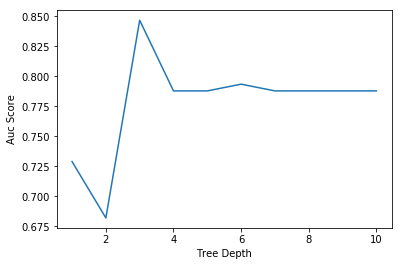

In [91]:
# trying with different Max Depth parameter
max_depths = np.arange(1,11,1)
train_results = []
test_results = []
acc_score=[]
for max_depth in max_depths :
  dt_max = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
  dt_max.fit(X_train,y_train)
  y_tree = dt_max.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_tree)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)
  acc_score.append(accuracy_score(y_test,y_tree))

# draw auc curv
plt.plot(max_depths, test_results)
plt.xlabel("Tree Depth")
plt.ylabel("Auc Score")

Text(0, 0.5, 'Accuracy Score')

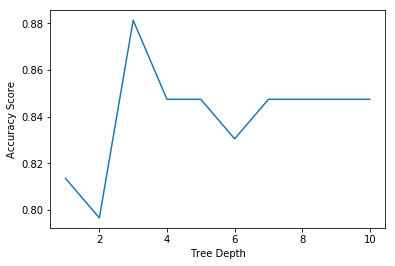

In [92]:
# draw accuracy curv with
plt.plot(max_depths, acc_score)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy Score")

* We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data
so max-depth=3 has given best auc score.

Text(0, 0.5, 'Auc Score')

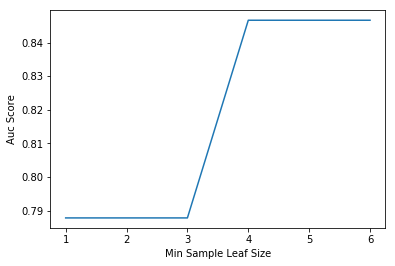

In [93]:
#min_samples_leaf is The minimum number of samples required to be at a leaf node. 
#This parameter is similar to min_samples_splits
min_sample_leafs = np.arange(1,7,1)
test_results_leaf = []
acc_score_leaf=[]
for min_leaf in min_sample_leafs :
  dt_min = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=min_leaf)
  dt_min.fit(X_train,y_train)
  y_min_leaf = dt_min.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_min_leaf)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results_leaf.append(roc_auc)
  acc_score_leaf.append(accuracy_score(y_test,y_min_leaf))

# draw auc curve
plt.plot(min_sample_leafs, test_results_leaf)
plt.xlabel("Min Sample Leaf Size")
plt.ylabel("Auc Score")

Text(0, 0.5, 'Accuracy Score')

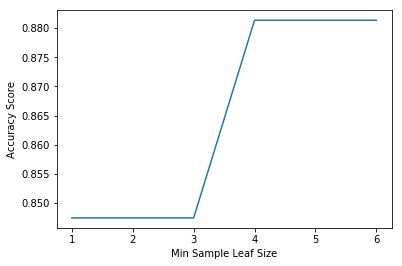

In [94]:
# draw auc curve
plt.plot(min_sample_leafs, acc_score_leaf)
plt.xlabel("Min Sample Leaf Size")
plt.ylabel("Accuracy Score")

* We can see low value of leaf will overfit the tree and large value of leaf size generaliaze the tree.But after further increasing leaf size model does not much get impacted.

In [0]:
# building model with optimal regularization parameter
dt_optimal = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=4)
dt_optimal.fit(X_train,y_train)
y_optimal = dt_optimal.predict(X_test)

In [100]:
# accuracy score
print('accuracy : ',accuracy_score(y_test,y_optimal))
print(pd.crosstab(y_test,y_optimal, margins=True, margins_name="Total"))

accuracy :  0.8813559322033898
col_0    0   1  Total
status               
0       13   4     17
1        3  39     42
Total   16  43     59


* As we can see My model perfoming well and accuracy improved much to 88.13 from 83.05 after regularization of tree.

Text(0, 0.5, 'Auc Score')

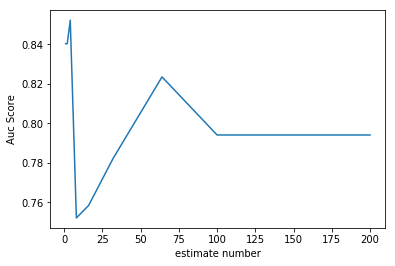

In [87]:
# Random forest 
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
test_results_rf=[]
# rcf=RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=9999)
for estimator in n_estimators :
  rf = RandomForestClassifier(n_estimators=estimator,random_state=9999)
  rf.fit(X_train, y_train)
  y_pred_rf = rf.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results_rf.append(roc_auc)

# draw auc curve
plt.plot(n_estimators,test_results_rf)
plt.xlabel("estimate number")
plt.ylabel("Auc Score")

In [0]:
# from above n_estimators = 64
rf_optimal = RandomForestClassifier(n_estimators=64,random_state=9999)
rf_optimal.fit(X_train, y_train)
y_rf=rf_optimal.predict(X_test)

In [109]:
# accuracy score
print('accuracy : ',accuracy_score(y_test,y_rf))
print(pd.crosstab(y_test,y_rf, margins=True, margins_name="Total"))

accuracy :  0.8983050847457628
col_0    0   1  Total
status               
0       11   6     17
1        0  42     42
Total   11  48     59


In [112]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.88      1.00      0.93        42

    accuracy                           0.90        59
   macro avg       0.94      0.82      0.86        59
weighted avg       0.91      0.90      0.89        59

